In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('../Modules/polaritymodel')
sys.path.append('..')
from Model2species import Model
import pandas as pd

In [2]:
params = [[1, -3], [0.99, -3], [0.95, -3]]

### Simulate

In [3]:
def simulate(p):
    m = Model(Dm=0.1, kon1=1-p[0] , kon2=p[0], koff1=10 ** p[1], koff2=1, psi=0.174, tot=1.56, 
              xsteps=100)
    
    # Run without flow
    soln1, _, _, _ = m.run(Tmax=500, flow=False)
    
    # Run with flow
    soln2, _, _, _ = m.run(Tmax=500, flow=True, start=soln1)
    
    # Normalise
    norm = np.mean(soln1[0]) + np.mean(soln1[1])
    return [s / norm for s in soln2]

In [4]:
solns = [simulate(p) for p in params]

/Users/blandt/anaconda3/anaconda3/envs/model/lib/python3.7/site-packages/polaritypde/pde.py:114: RuntimeWarning: invalid value encountered in true_divide
  change = np.max([np.max(np.abs(X[i] - Xn_new[i]) / Xn_new[i]) * (60 / dtnew) for i in range(nvars)])


### Figures

In [5]:
def create_fig(ax, soln):
    ax.plot(np.linspace(0, 60, 100), soln[0] + soln[1], label='Total')
    ax.plot(np.linspace(0, 60, 100), soln[1], c='tab:orange', linestyle='--', label='Fast state')
    ax.plot(np.linspace(0, 60, 100), soln[0], c='tab:orange', label='Slow state')
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticks([0, 60])
    ax.set_yticks([0, 1, 2, 3])
    ax.set_xticklabels(['A', 'P'])
    ax.set_ylabel('Normalised concentration', fontsize=8)
    ax.legend(frameon=False, fontsize=7, loc='upper right')

    fig.set_size_inches(2.5, 1.8)
    fig.tight_layout()  
    return fig

<IPython.core.display.Javascript object>


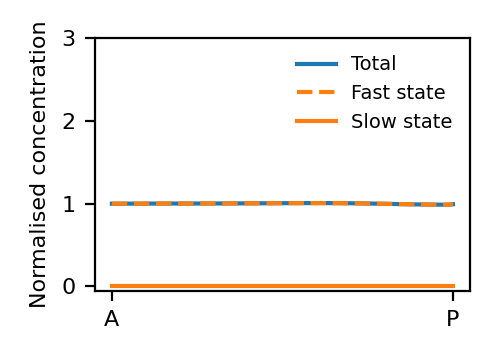

<IPython.core.display.Javascript object>


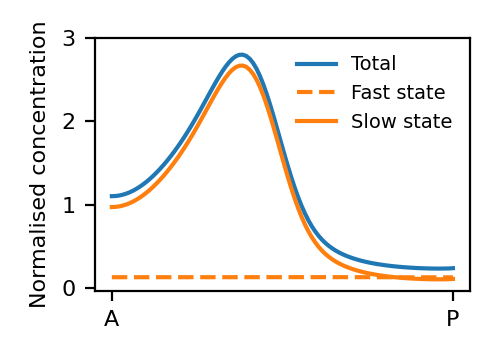

<IPython.core.display.Javascript object>


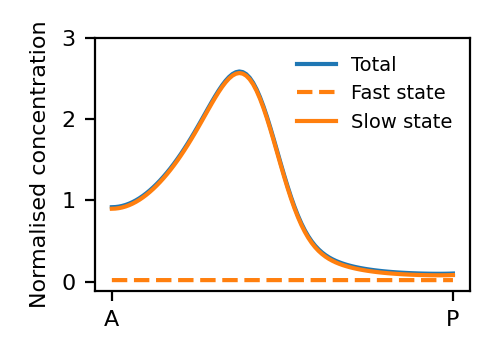

In [6]:
for s, p in zip(solns, params): 
    fig, ax = plt.subplots()
    fig = create_fig(ax, s)
    fig.savefig('Figs/twospecies_profiles_line_%s.png' % p[0], dpi=600, transparent=True)
    fig.savefig('Figs/twospecies_profiles_line_%s.svg' % p[0], dpi=600, transparent=True)

In [7]:
def lighten(color, amount=1.8):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [8]:
def create_fig_fill(ax, soln):
    ax.fill_between(np.linspace(0, 60, 100), soln[0], soln[0] + soln[1], color='tab:blue', 
                    label='Fast state', linewidth=0)
    ax.fill_between(np.linspace(0, 60, 100), np.zeros(100), soln[0], color=lighten('tab:blue'), label='Slow state',
                   linewidth=0)
    
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticks([0, 60])
    ax.set_yticks([0, 1, 2, 3])
    ax.set_xticklabels(['A', 'P'])
    ax.set_ylabel('Normalised concentration', fontsize=8)
    ax.set_ylim(0, 3)
    ax.legend(frameon=False, fontsize=7, loc='upper right')
    
    fig.set_size_inches(2.5, 1.8)
    fig.tight_layout()  
    return fig

<IPython.core.display.Javascript object>


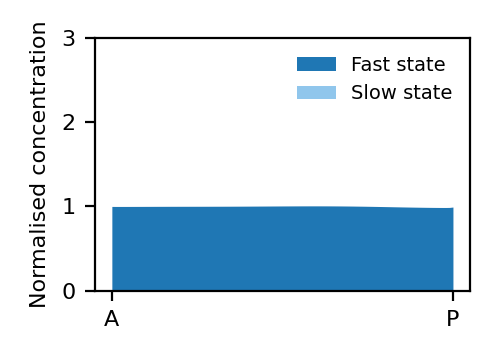

<IPython.core.display.Javascript object>


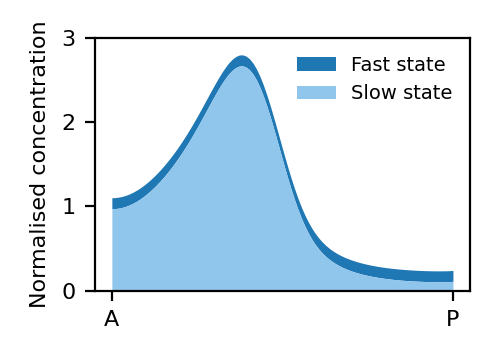

<IPython.core.display.Javascript object>


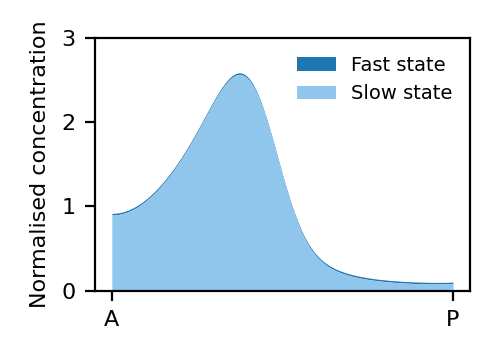

In [9]:
for s, p in zip(solns, params): 
    fig, ax = plt.subplots()
    fig = create_fig_fill(ax, s)
    fig.savefig('Figs/twospecies_profiles_fill_%s.png' % p[0], dpi=600, transparent=True)
    fig.savefig('Figs/twospecies_profiles_fill_%s.svg' % p[0], dpi=600, transparent=True)